# **EMPRESA DE RETAIL**
Ustedes hacen parte del equipo de análisis de la información de una empresa de retail. La
organización está implementando una nueva aplicación que según el equipo de diseño está en
capacidad de atraer una mayor cantidad de usuarios, siempre y cuando se establezcan medidas de
comunicación y promoción diferencial dependiendo del tipo de cliente. Ustedes deciden entonces
implementar un modelo de datos que les permita diferenciar los clientes según su comportamiento
actual.

El equipo de mercadeo de la compañía está seguro que los clientes pueden dividirse en 3 grupos.
Por medio del modelamiento confirme o rechace esta hipótesis.



# Metodologia ASUM - DM

1. Es una empresa de retail que busca implementar una nueva aplicación con el fin de atraer una mayor cantidad de usuarios. Para lograrlo, se plantea segmentar a los clientes según características que los diferencien, lo cual permitirá diseñar modelos de comunicación y promoción personalizados para cada grupo.

2. Entendimiento analito: Se debe diseñar un experimento que permita agrupar a los clientes en una cantidad específica de grupos. Esto permitirá identificar segmentos con comportamientos similares y definir así cuántas acciones diferenciadas podrían implementarse de manera efectiva.

3. Requerimientos de datos: Se requiere información demográfica de los clientes, datos relacionados con su comportamiento de compra y uso del servicio, así como variables propias del negocio que permitan identificar patrones de consumo y respuesta a campañas de mercadeo.

4. Recoleccion de datos: 

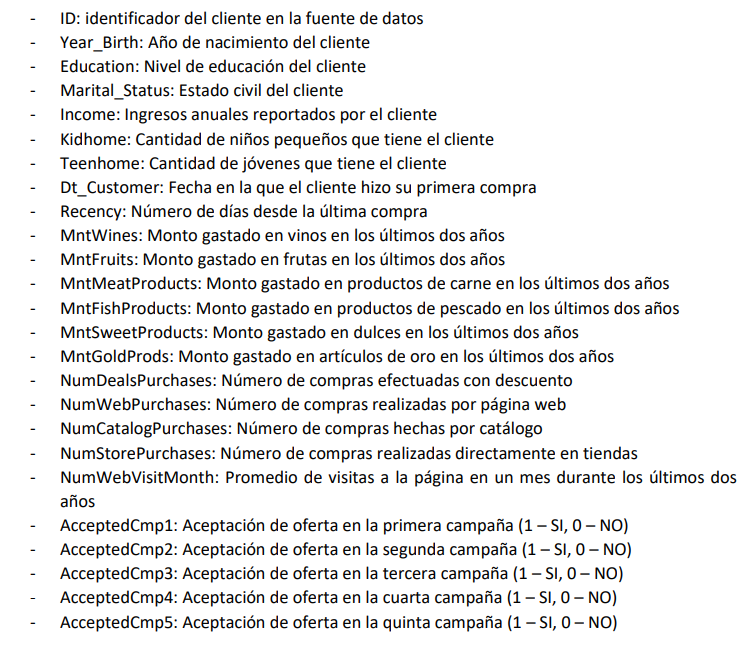
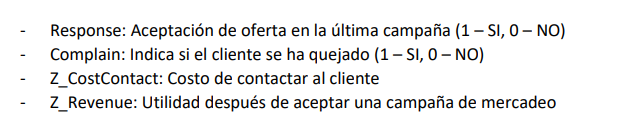

In [1]:
#librerias 
##Tratamiento estructurado de datos 
import pandas as pd
import numpy as np

##graficos 
import matplotlib.pyplot as plt
import seaborn as sb

##Advertencias
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("datos_caso_1.csv", sep=";")
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

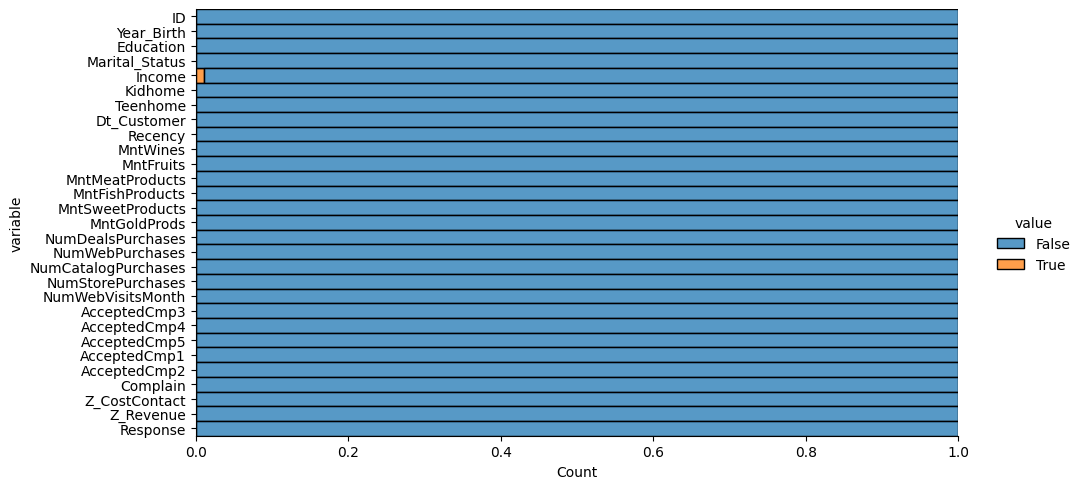

In [4]:
#Visualizar la proporcion de datos nulos por variables

data.isnull().melt().pipe(lambda df: sb.displot(data= df, y = 'variable', hue = 'value',
                                            multiple = 'fill', aspect = 2))
plt.show()

In [5]:
# Calcular el porcentaje de nulos por columna
porcentaje_nulos = data['Income'].isnull().mean() * 100

print('Porcentaje de Nulos en variable Income: '+str(porcentaje_nulos) + ' %')


Porcentaje de Nulos en variable Income: 1.0714285714285714 %


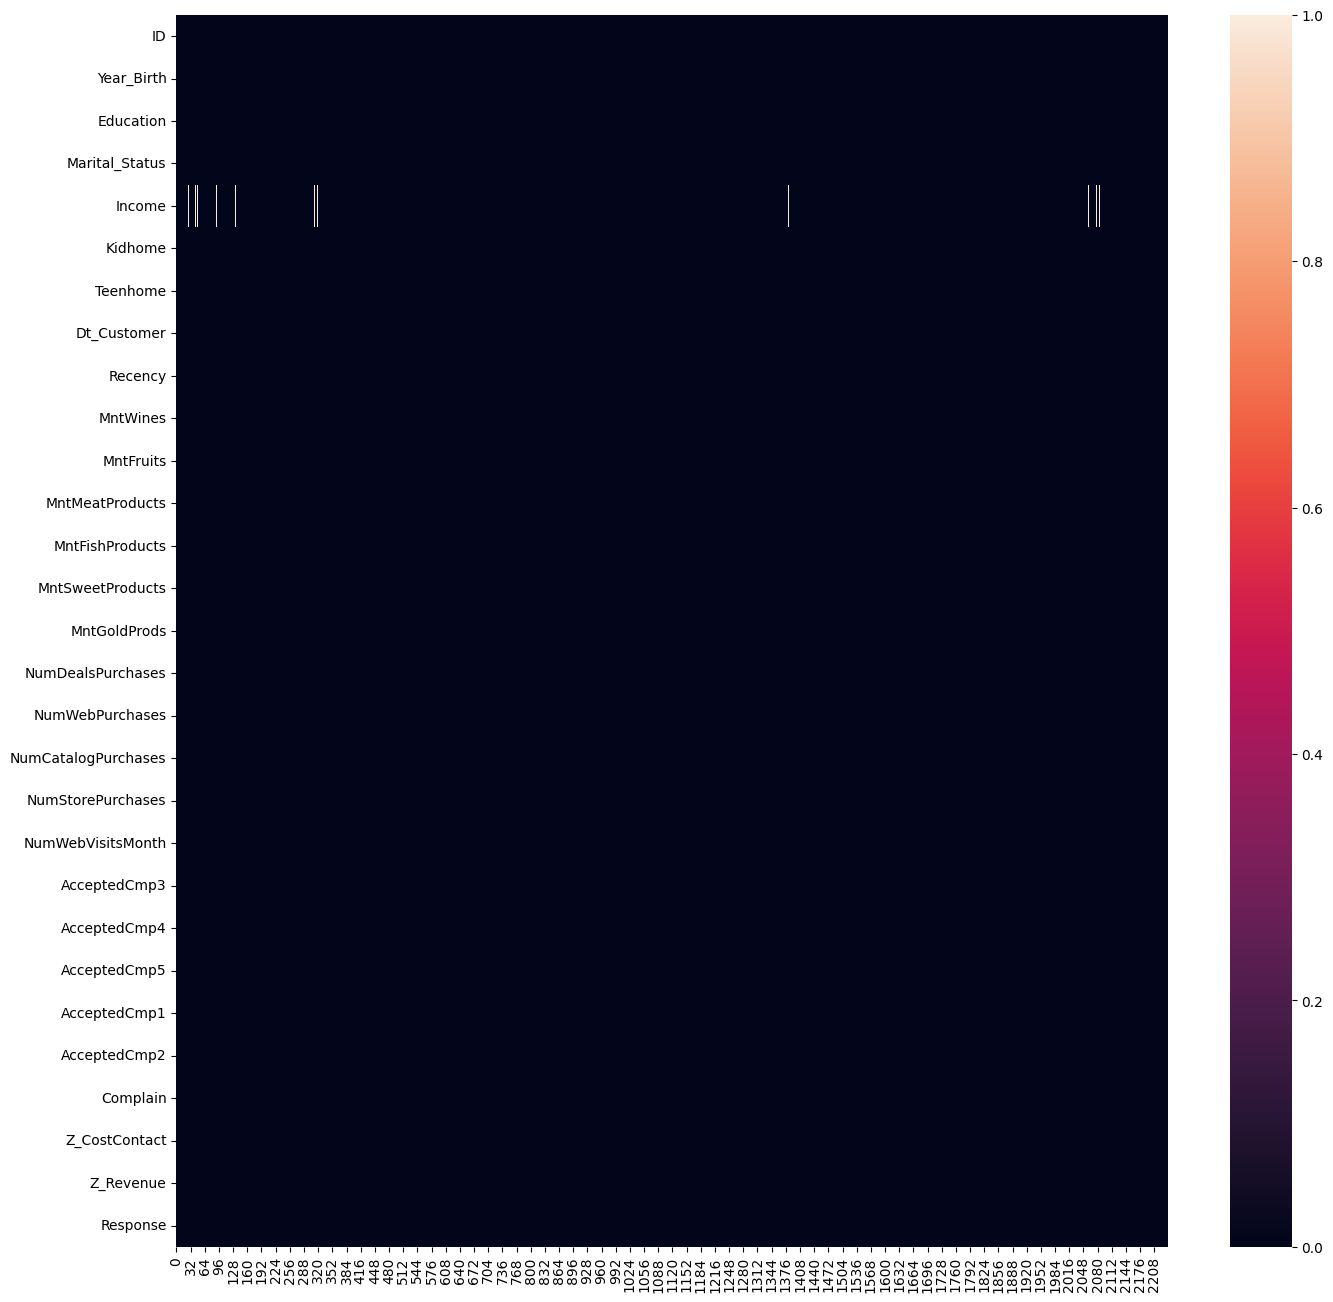

In [6]:
#Visualizar la matriz de correlacion de datos nulos por variables. Negro indica que no hay datos nulos, blanco indica que si hay datos nulos
plt.figure(figsize=(16, 16))
data.isnull().transpose().pipe(lambda df: sb.heatmap(data=df))
plt.show()

In [7]:
##Se decide eliminar los registros Nulos debido a que son el 1%
mod_data = data.dropna(subset=['Income'])

mod_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

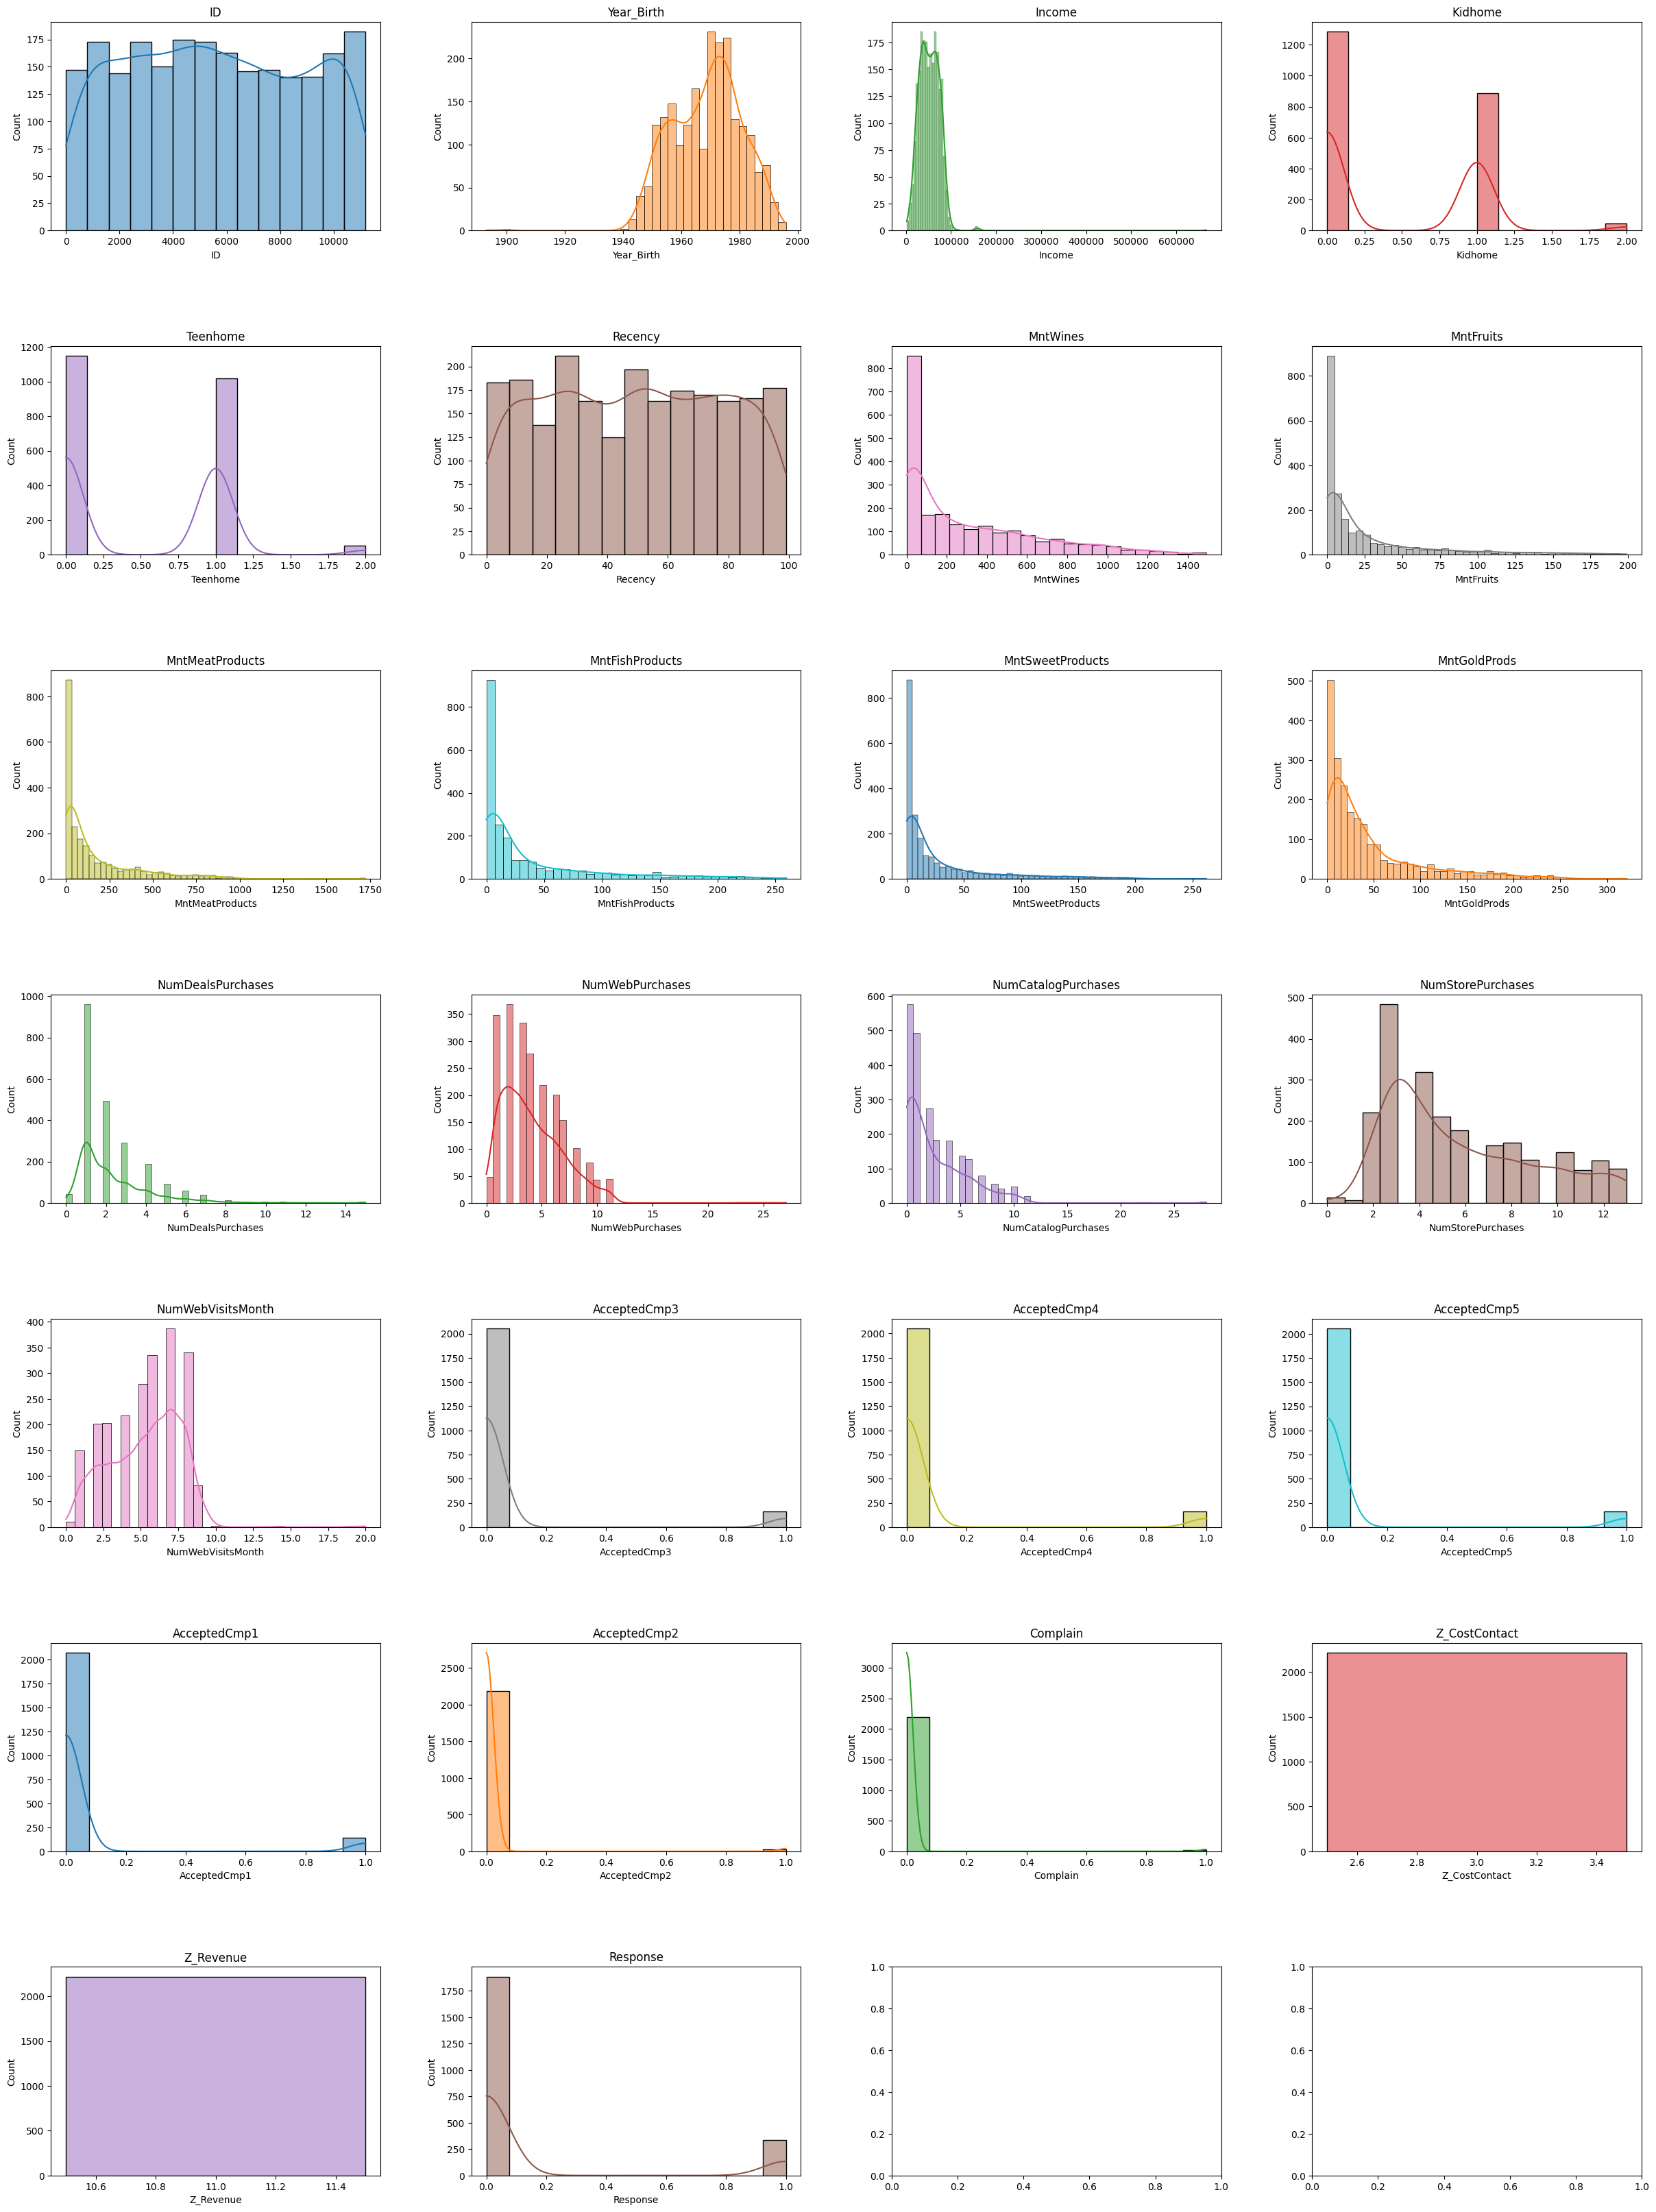

In [8]:
#Exploracion unicariada de los datos
##Para datos numericos: histogramas de frecuencia
##Para datos categoricos: graficos de torta

##HISTOGRAMA DE FRECUENCIA
fig, ax = plt.subplots(7,4, figsize = (16,16))
ax = ax.flat
num_col = mod_data.select_dtypes(include= ['int64','float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = mod_data, x= col,
                kde= True, color= (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=2, right=1.5)
plt.show()


ID: se ignora porque es una variable identificadora única sin valor predictivo.

Z_Revenue: se ignora porque su valor es constante, por lo tanto no aporta variabilidad.

Z_CostContact: se ignora porque también es constante, sin información útil.



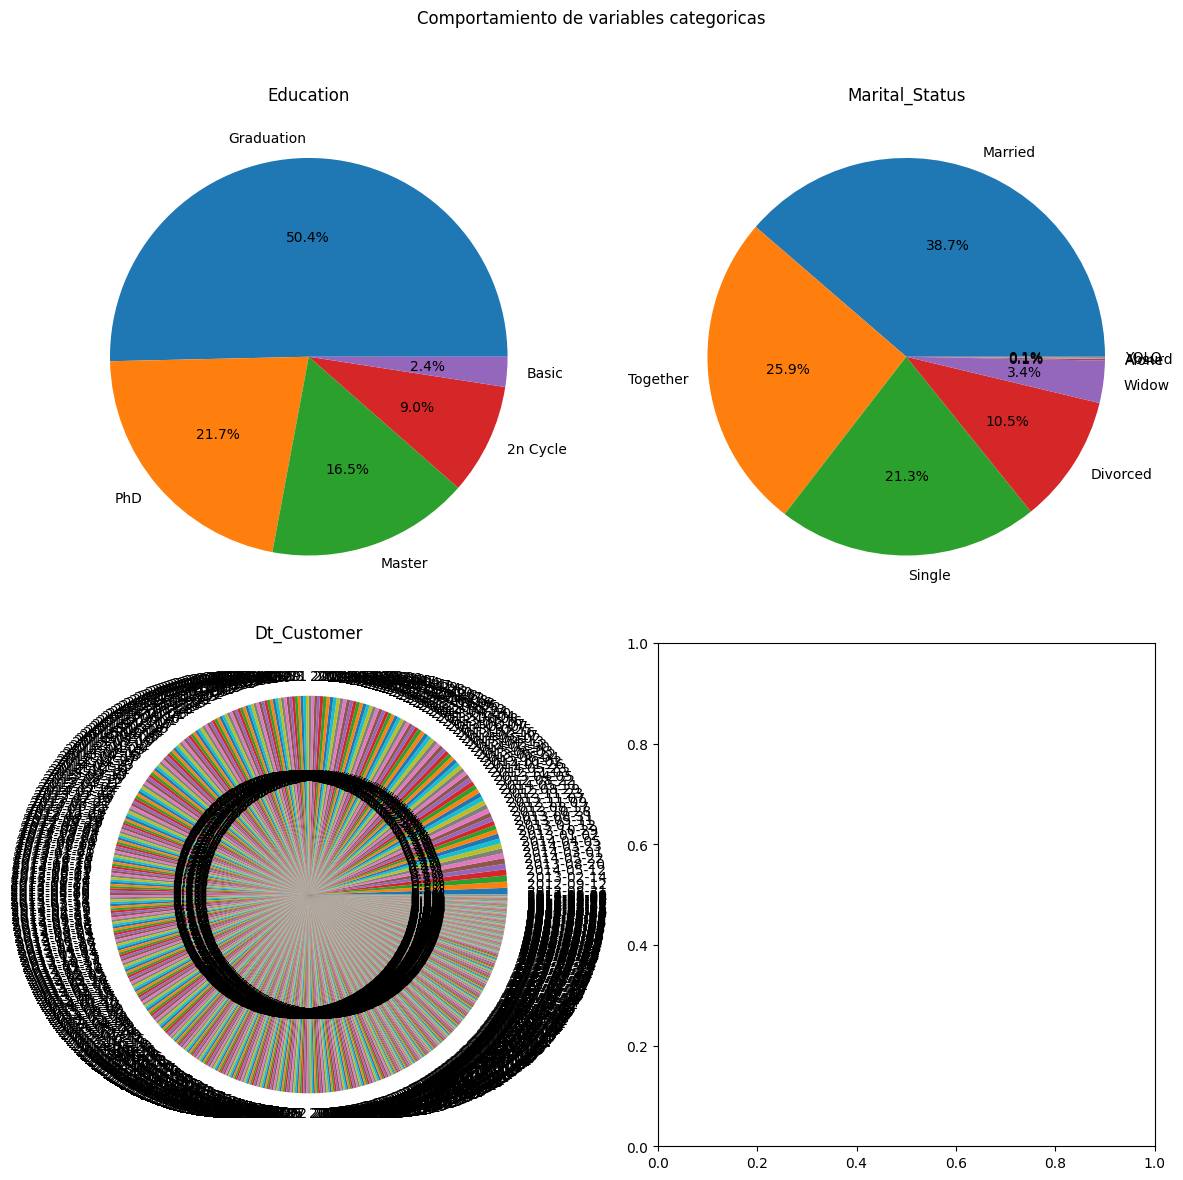

In [9]:
#Se ingnoran las variables desbalanceadas, las que tengan mas de un 80%
##Graficos de torta
fig, ax = plt.subplots(2,2, figsize =(12,12))
ax = ax.flat
cat_col = mod_data.select_dtypes(include= ['object']).columns
for i, col in enumerate(cat_col):
    ax[i].pie(x =mod_data[col].value_counts(), 
                labels = mod_data[col].value_counts().index, 
                autopct='%0.1f%%')
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Comportamiento de variables categoricas')
plt.show()

Se Ignora Dt_costumer: tiene valores únicos por cada cliente y no aporta información útil directamente

In [10]:
data_del = mod_data.drop(['ID', 'Z_Revenue','Z_CostContact','Recency', 'Dt_Customer' ], axis=1)
data_del.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   int64 

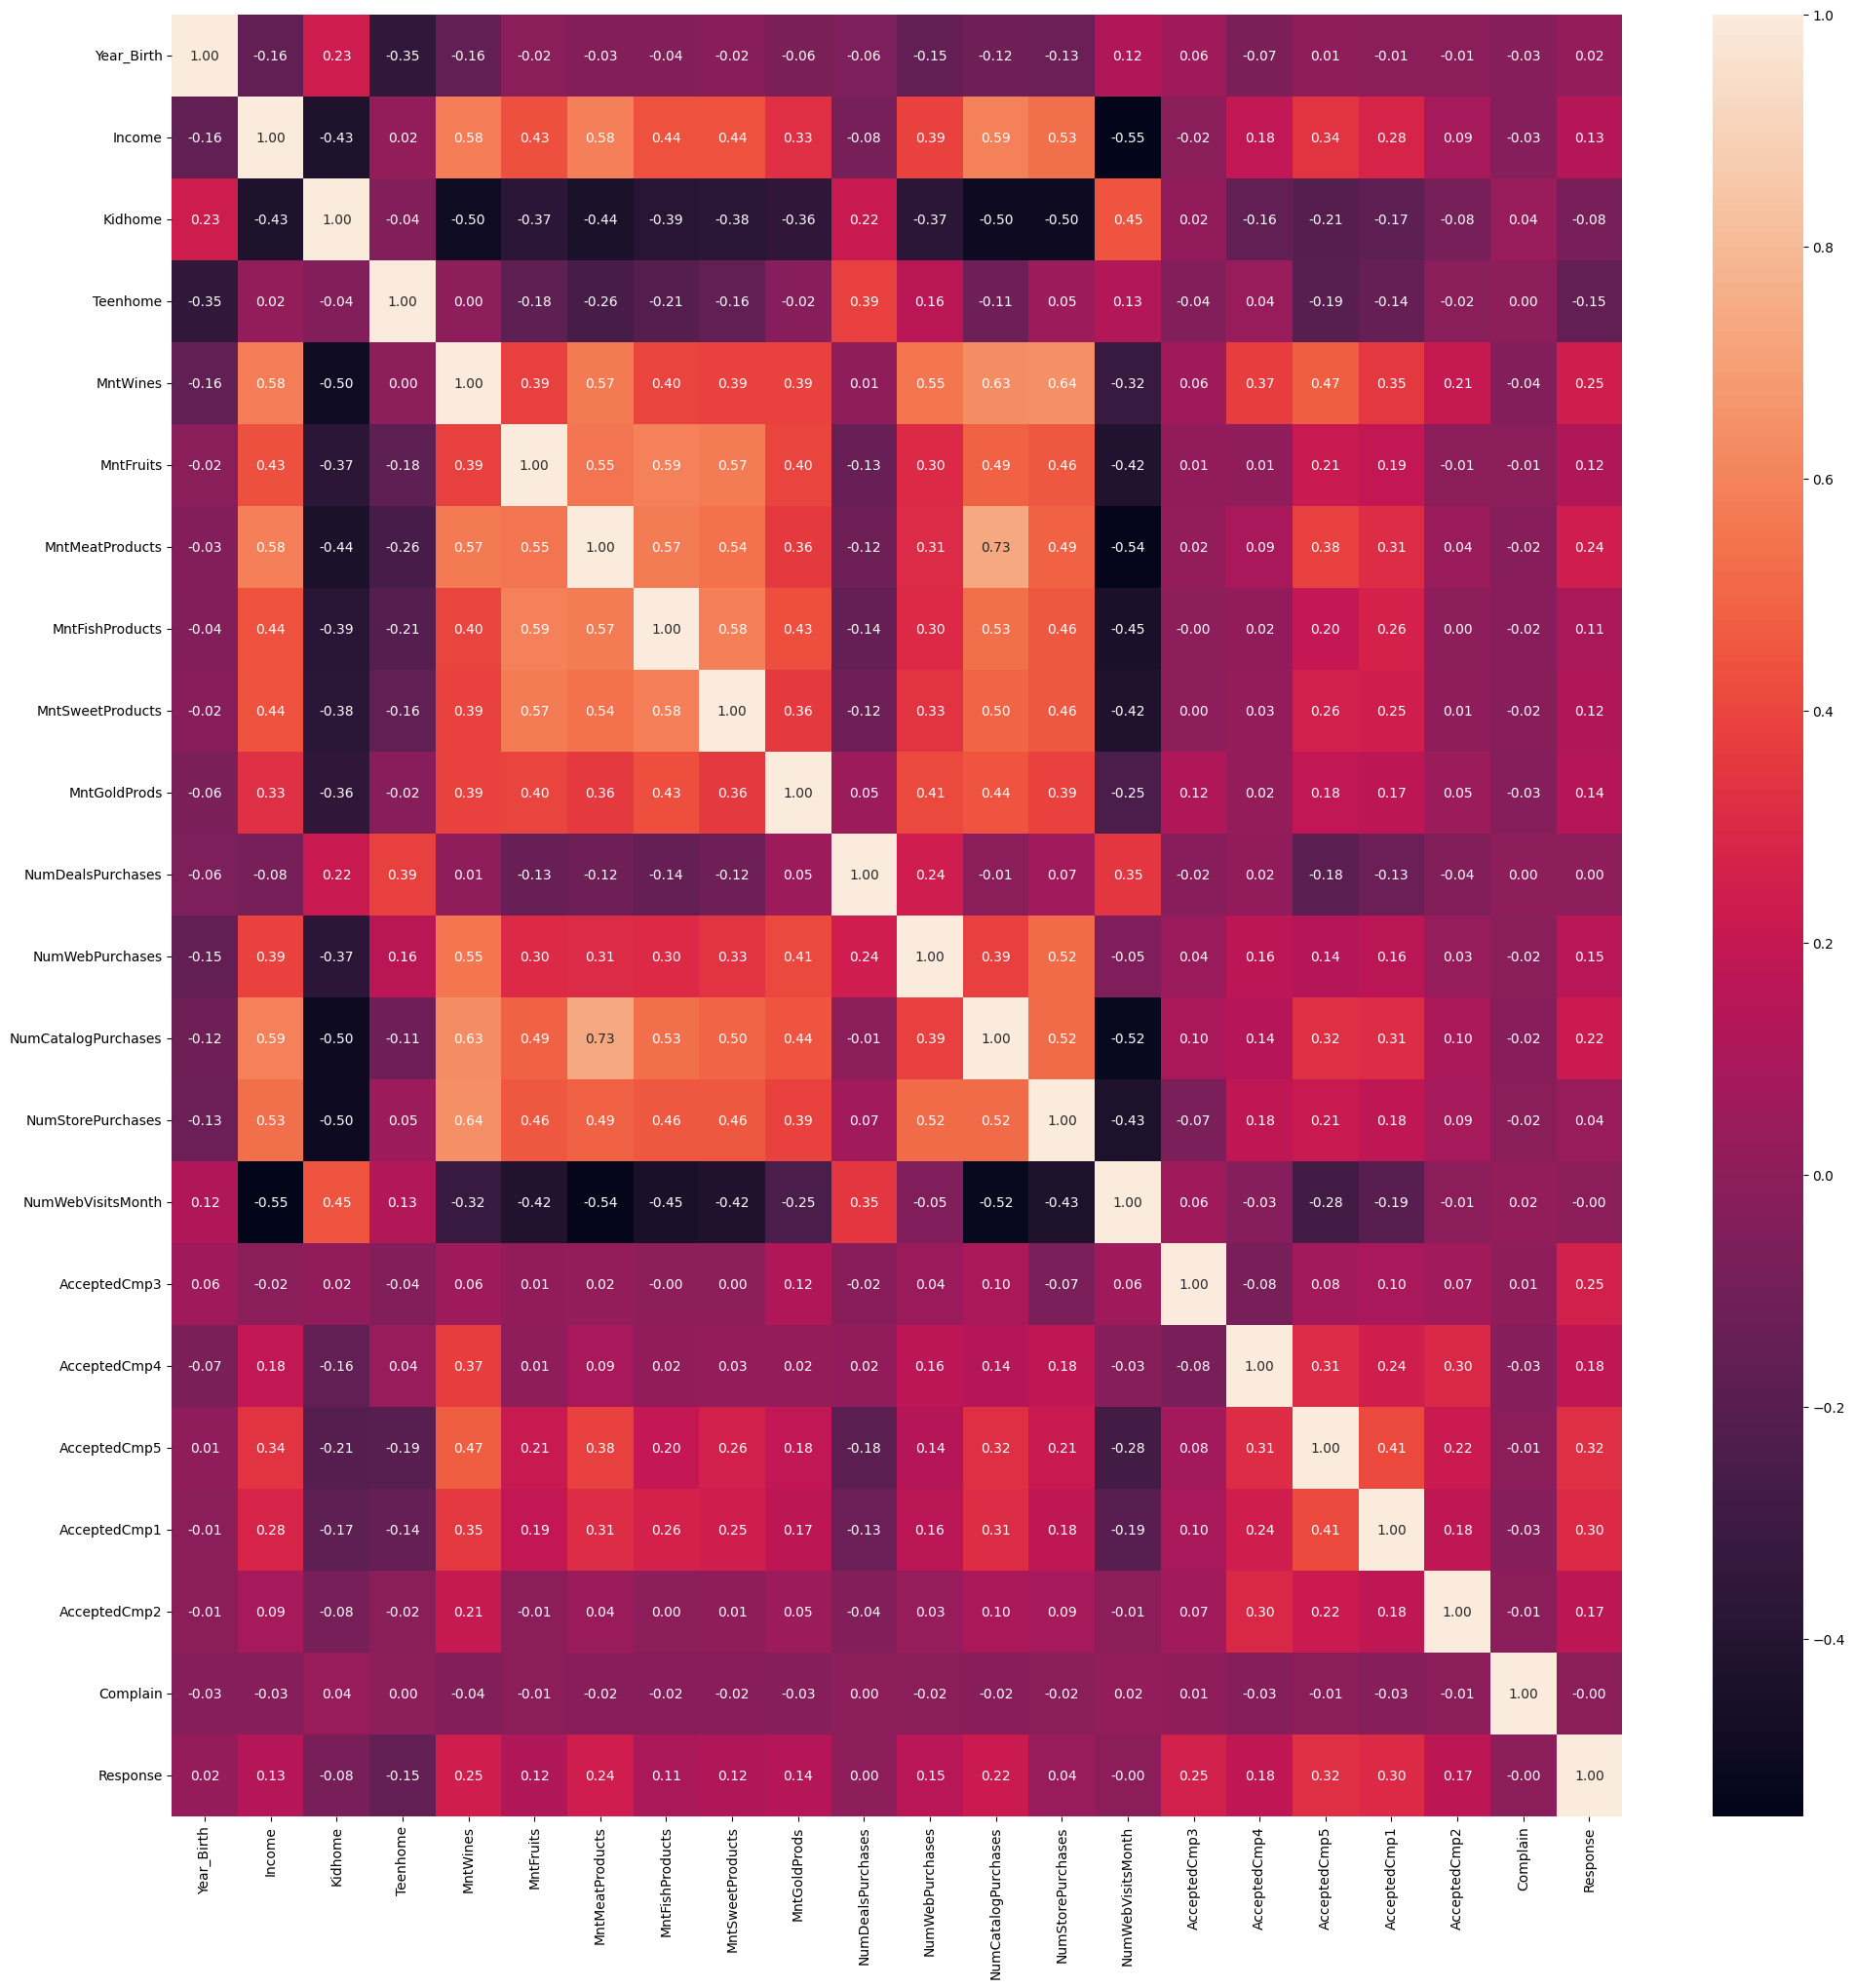

In [11]:
#Grafico de correlacion para analisis multivariado
plt.figure(figsize=(24, 24))
sb.heatmap(data = data_del.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()


No hay correlaciones fuertes entre las variables numéricas, cada variable aporta información relativamente independiente de las otras.

Por lo tanto, no se eliminar ninguna variable por correlación.

In [12]:
#Transformacion de variables 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline


#Identificar las columnas numericas y categoricas
num_col = data_del.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_col = data_del.select_dtypes(include=['object']).columns.tolist()


#Definir el tipo de transformacion por tipo de dato
num_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])
cat_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

#Diseno de transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_col),
        ('cat', cat_transformer, cat_col)
    ],
    remainder='passthrough' 
)

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [13]:
data_array= preprocessor.fit_transform(data_del)
data_array

array([[0.62135922, 0.08483222, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.59223301, 0.06709518, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.69902913, 0.10509733, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.85436893, 0.08309221, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.61165049, 0.10153609, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.59223301, 0.07690815, 0.5       , ..., 0.        , 0.        ,
        0.        ]])

In [52]:
cod_cat = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels = np.concatenate([num_col, cod_cat])
data_pro = pd.DataFrame(data_array, columns=labels)
data_pro.head()

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.621359,0.084832,0.0,0.0,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.592233,0.067095,0.5,0.5,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.699029,0.105097,0.0,0.0,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.883495,0.037471,0.5,0.0,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.854369,0.085065,0.5,0.0,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


7. Construccion del modelo

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

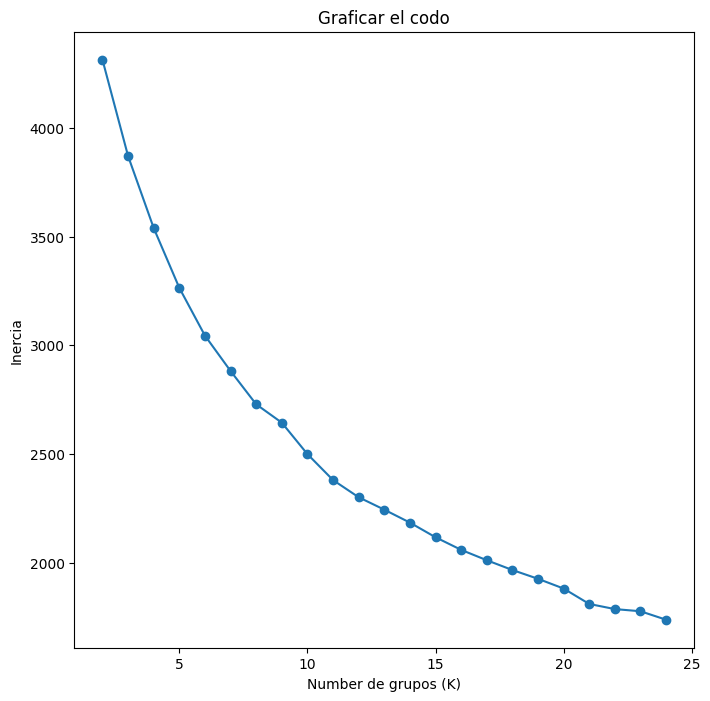

In [16]:
#Buscar el valor de K optimo

range_k = range(2, 25)
inertia = []

for n_clusters in range_k:
    kmeans_model = KMeans(n_clusters=n_clusters, n_init=20, random_state=123)
    kmeans_model.fit(data_pro)
    inertia.append(kmeans_model.inertia_)
    
    
#Graficar el codo
plt.figure(figsize=(8, 8))
plt.plot(range_k, inertia, marker='o')
plt.title('Graficar el codo')
plt.xlabel('Number de grupos (K)')
plt.ylabel('Inercia')
plt.show()


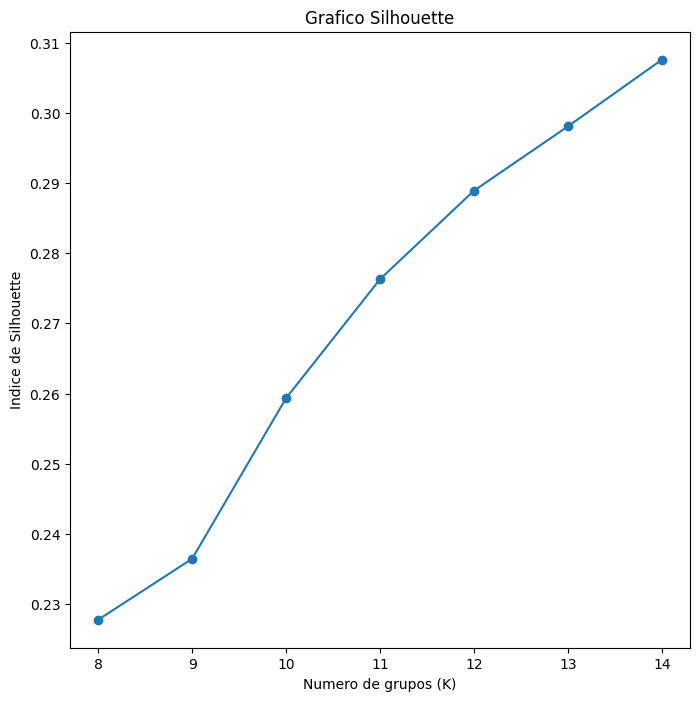

In [17]:
#Busqueda fina de K
range_k_fine = range(8, 15)
sil_score = []

for n_clusters in range_k_fine:
    kmeans_model = KMeans(n_clusters=n_clusters, n_init=20, random_state=123)
    kmeans_model.fit(data_pro)
    
    cluster_labels = kmeans_model.fit_predict(data_pro)
    
    sil_avg = silhouette_score(data_pro, cluster_labels)
    sil_score.append(sil_avg)
    
#Graficar el codo
plt.figure(figsize=(8, 8))
plt.plot(range_k_fine, sil_score, marker='o')
plt.title('Grafico Silhouette')
plt.xlabel('Numero de grupos (K)')
plt.ylabel('Indice de Silhouette')
plt.show()


Tras aplicar el método del codo y calcular el índice de Silhouette en el rango de K entre 8 y 15, se observa que el valor óptimo de K es 14, 

In [18]:
kmeans_model_final = KMeans(n_clusters=14, n_init=20, random_state=123)
kmeans_model_final.fit(data_pro)

,n_clusters,14
,init,'k-means++'
,n_init,20
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,123
,copy_x,True
,algorithm,'lloyd'


**Jerarquico Aglomerativo**


In [19]:

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [20]:
#Función para dibujar el dendrograma
def dibujarDendrograma(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
 
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
 
    # Plot
    dendrogram(linkage_matrix, **kwargs)

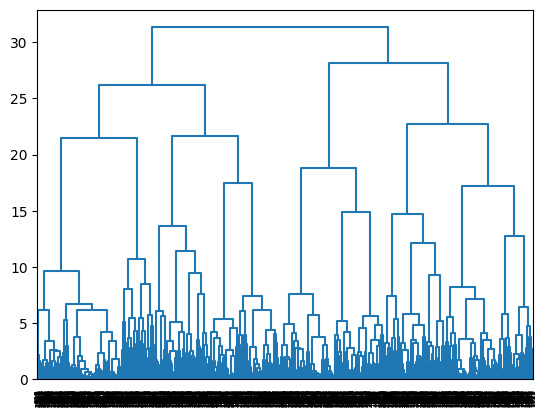

In [21]:
#Varianza 
h_clust_ward = AgglomerativeClustering(metric ='euclidean', linkage='ward', distance_threshold=0, n_clusters=None)
h_clust_ward.fit(X = data_pro)

dibujarDendrograma(h_clust_ward,color_threshold=0)

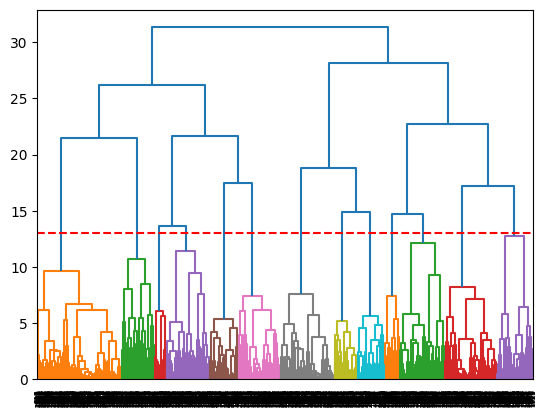

In [22]:
dendrogram_prum = 13 # 16 a ojimetro por el dendrograma de varianza
dibujarDendrograma(h_clust_ward, color_threshold=dendrogram_prum)
plt.axhline(y=dendrogram_prum, color='r', linestyle='--')
plt.show()
#Mismas distacias?

In [23]:
h_clust_final = AgglomerativeClustering(metric ='euclidean', linkage='ward', n_clusters=13) # el 13 es lo que nos dio el dendrograma
h_clust_final.fit(data_pro)

,n_clusters,13
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


**DBSCAN**

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from itertools import product

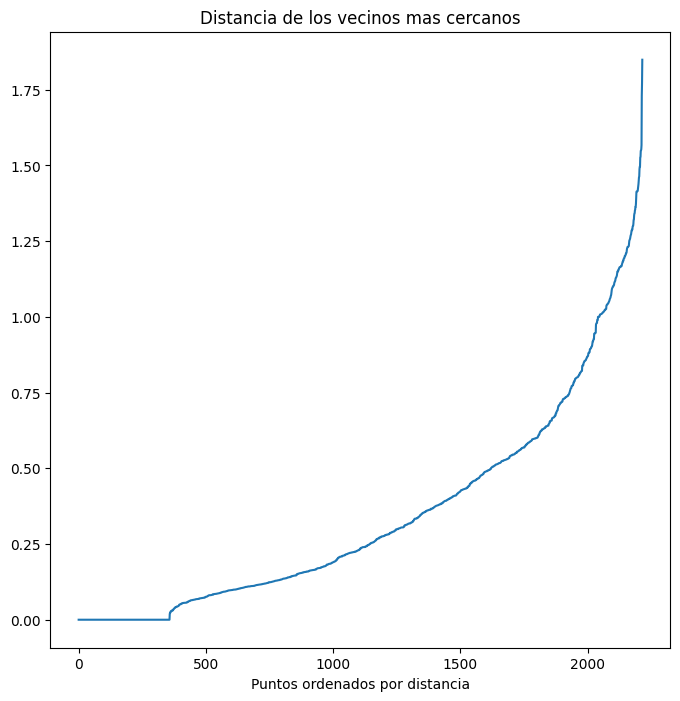

In [115]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(data_pro)
distance, index = neighbors_fit.kneighbors(data_pro)
distance = np.sort(distance, axis=0)
distance = distance[:, 1]

plt.figure(figsize=(8, 8))
plt.plot(distance)
plt.title('Distancia de los vecinos mas cercanos')
plt.xlabel('Puntos ordenados por distancia')
plt.show()  


#Se busca el punto donde la curva se vuelve asistotica en la parte derecha

In [39]:
eps_values = np.arange(1.2,1.75,0.05)
min_samples = np.arange(2, 10)
dbscan_params = list(product(eps_values, min_samples))
sil_score = []

for p in dbscan_params:
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(data_pro)
    sil_score.append(silhouette_score(data_pro, y_pred))

<Axes: xlabel='Epsilon', ylabel='Minimas muestras'>

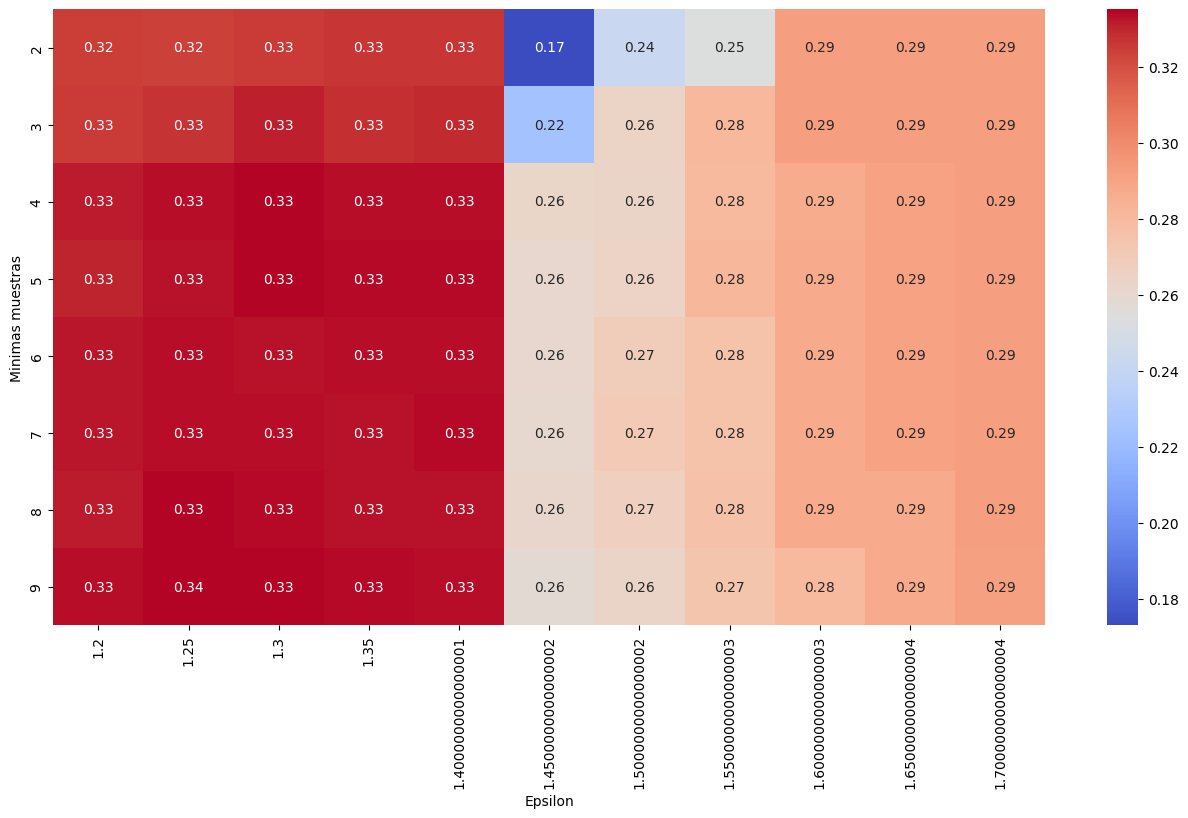

In [ ]:
df_param_adj = pd.DataFrame.from_records(dbscan_params, columns=['Epsilon', 'Minimas muestras'])
df_param_adj['Score'] = sil_score
pivot_data = pd.pivot_table(df_param_adj,
                            values='Score', 
                            index='Minimas muestras', 
                            columns='Epsilon')
plt.figure(figsize=(16, 8))
sb.heatmap(pivot_data, annot=True, fmt='.2f', cmap='coolwarm')

#Se escoge el mejor valor de epsilon y minimas muestras dependiedno de la puntuacion de silhouette, 3.3 es la mejor en este caso. 
#si existen varias en misma puntuacion, se escoge la que tenga el menor valor de epsilon y menor de minimas muestras


Se escoge minimas muestras de 3 y epsilon de 1.6, ya que es el mejor valor de epsilon y minimas muestras dependiedno de la puntuacion de silhouette, 2.9 es la mejor en este caso. Teniendo en cuenta que el minimo de grupos es 3.

In [55]:
dbscan_final = DBSCAN(eps=1.25, min_samples=9)
dbscan_final.fit(data_pro)

,eps,1.25
,min_samples,9
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


**GAUSSIAN MIXTURE MODEL(GMM)**

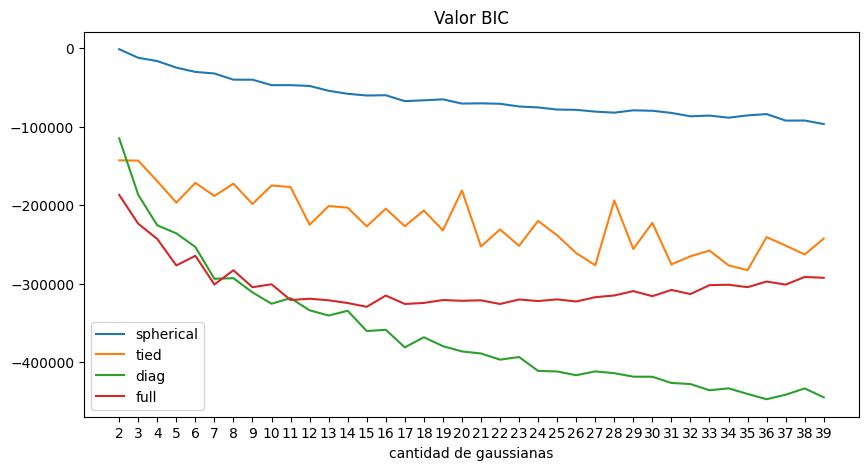

In [28]:
from sklearn.mixture import GaussianMixture

fig, ax = plt.subplots(figsize=(10, 5))
n_gaus = range(2, 40)
var_types =['spherical', 'tied', 'diag', 'full']

for covariance_type in var_types:
    valor_bic = []
    for i in n_gaus:
        modelo = GaussianMixture(n_components=i, covariance_type=covariance_type)
        modelo.fit(data_pro)
        valor_bic.append(modelo.bic(data_pro))
    ax.plot(n_gaus, valor_bic, label=covariance_type)

ax.set_title('Valor BIC')
ax.set_xlabel('cantidad de gaussianas')
ax.set_xticks(n_gaus)
ax.legend()
plt.show()

#Se selecciona el minimo valor de BIC, en este caso aprox 38 es el mejor valor de gaussianas de la full

In [56]:
gmm_final = GaussianMixture(n_components=39, covariance_type='diag')
gmm_final.fit(data_pro)

,n_components,39
,covariance_type,'diag'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,None


8. Evalucion del modelo 

In [57]:
labels_kmeans = kmeans_model_final.predict(data_pro)
labels_h_clust = h_clust_final.fit_predict(data_pro)
labels_dbscan = dbscan_final.fit_predict(data_pro)
labels_gmm = gmm_final.predict(data_pro)

In [58]:
sil_kmeans = silhouette_score(data_pro, labels_kmeans)
sil_h_clust = silhouette_score(data_pro, labels_h_clust)
sil_dbscan = silhouette_score(data_pro, labels_dbscan)
sil_gmm = silhouette_score(data_pro, labels_gmm)

print(f'Silhouette KMeans: {sil_kmeans:.3f}')
print(f'Silhouette H-Clust: {sil_h_clust:.3f}')
print(f'Silhouette DBSCAN: {sil_dbscan:.3f}')
print(f'Silhouette GMM: {sil_gmm:.3f}')

#Si DBSCAN tiene el mayor valor hay que revisar los grupos de DBSCAN y la cantidad de ruido para determinar si es valido

Silhouette KMeans: 0.308
Silhouette H-Clust: 0.280
Silhouette DBSCAN: 0.335
Silhouette GMM: 0.242


In [61]:
np.unique(labels_dbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20], dtype=int64)

In [62]:
data_pro['DBSCAN'] = labels_dbscan
data_pro

,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,DBSCAN
0,0.621359,0.084832,0.0,0.0,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,0.592233,0.067095,0.5,0.5,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.699029,0.105097,0.0,0.0,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.883495,0.037471,0.5,0.0,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.854369,0.085065,0.5,0.0,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.718447,0.089472,0.0,0.5,0.474883,0.216080,0.105507,0.162162,0.450382,0.769470,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8
2212,0.514563,0.093669,1.0,0.5,0.271936,0.000000,0.017391,0.000000,0.000000,0.024922,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
2213,0.854369,0.083092,0.0,0.0,0.608171,0.241206,0.125797,0.123552,0.045802,0.074766,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
2214,0.611650,0.101536,0.0,0.5,0.286671,0.150754,0.124058,0.308880,0.114504,0.190031,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3


In [63]:
data_pro.DBSCAN.value_counts()

DBSCAN
 8     418
 1     270
 0     241
 2     179
 11    131
-1     121
 4     112
 5     111
 3      98
 17     90
 13     75
 12     71
 16     55
 10     51
 7      36
 9      32
 14     32
 15     22
 6      20
 19     19
 20     18
 18     14
Name: count, dtype: int64